In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

[1:] լեյբլը հանած

In [4]:
# df_train.iloc[10][1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
item = df_train.iloc[10][1:].values
item = item.reshape(28,28)

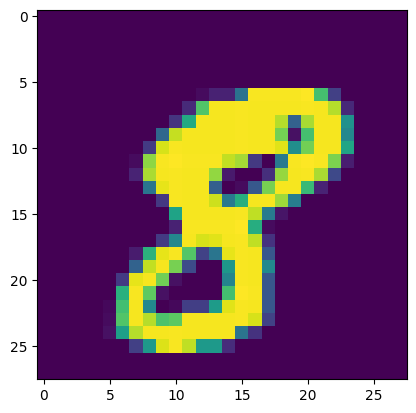

In [5]:
plt.imshow(item)

բաժանում ենք 255-ի որ սարքենք սև սպիտակ

In [6]:
item = item/255

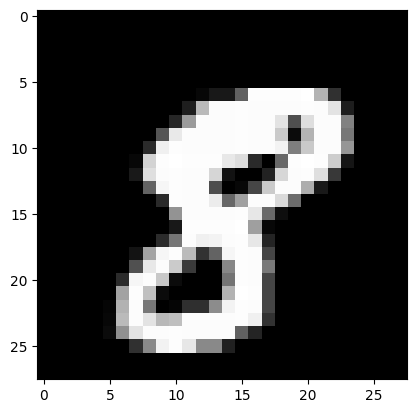

In [7]:
plt.imshow(item,cmap='grey')

In [8]:
X = df_train.drop('label',axis=1)
y = df_train['label']

In [9]:
from keras.utils import to_categorical

In [10]:
#X popoxum enq (42000, 28, 28) chapi
X = X.values.reshape((X.values.shape[0],28, 28))
#isk y (42000, 10)
y = to_categorical(y)

In [11]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(784, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 784)               4240656   
                                                                 
 dense_1 (Dense)             (None, 120)               94200     
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                        

In [18]:
model.fit(X,y,epochs = 2)

Epoch 1/2
1313/1313 [==============================] - 58s 43ms/step - loss: 0.5931 - accuracy: 0.9290
Epoch 2/2
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0739 - accuracy: 0.9773


In [26]:
image = plt.imread("0_kKxxK1YXSyWMEBtS (1).png")

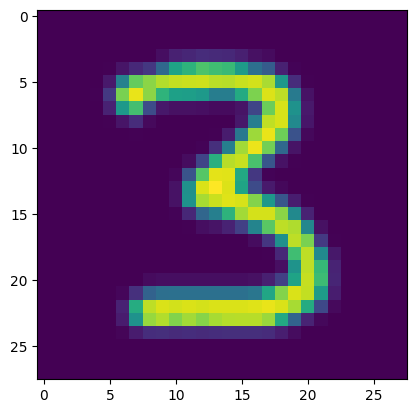

In [27]:
plt.imshow(image)

In [28]:
image = image*255

In [29]:
image = image.reshape(1,28,28)

In [30]:
np.argmax(model.predict(image))

1/1 [==============================] - 0s 32ms/step


3